# MOVIELENS - ANÁLISE DE DADOS

## Importação de dados

In [15]:
#importação das bibliotecas
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
#importação de arquivos
df1 = pd.read_csv('movies.csv')

In [17]:
df1.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [18]:
#analisando quantidade de filmes
len(df1['movieId'])

27278

In [19]:
#importação de arquivos
df2 = pd.read_csv('ratings.csv',sep=',')

In [20]:
df2.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


No arquivo de dados df1 tem-se os titulos dos filmes e seus respectivos gerenos discriminados. Porém a análise de dados em relação aos generos está comprometida pois cada filme pode ter mais de uma classificação, como por exemplo, "Jumanji (1995)" é classificado em três tipos de generos: Adventure, Children, Fantasy. 
Desta forma para uma melhor análise dos dados em relação aos generos é importante realizar uma "separação" dos generos dos filmes.


## Tratamento de dados
Para realizar a "separação" dos generos para cada filme cria-se a função "explode" para utiliza-la junto com a função "split('|')".  

In [21]:
def explode(df, lst_cols, fill_value=''):
    # verifica se "lst_cols" é uma coluna
    if lst_cols and not isinstance(lst_cols, list):
        lst_cols = [lst_cols]
    # todas as colunas recebe `lst_cols`
    idx_cols = df.columns.difference(lst_cols)

    # calcula o tamanho
    lens = df[lst_cols[0]].str.len()
    
    # Verifica se as linhas não estão vazias
    if (lens > 0).all():
        return pd.DataFrame({
            col:np.repeat(df[col].values, lens)
            for col in idx_cols
        }).assign(**{col:np.concatenate(df[col].values) for col in lst_cols}) \
          .loc[:, df.columns]
    else:
        
        return pd.DataFrame({
            col:np.repeat(df[col].values, lens)
            for col in idx_cols
        }).assign(**{col:np.concatenate(df[col].values) for col in lst_cols}) \
          .append(df.loc[lens==0, idx_cols]).fillna(fill_value) \
          .loc[:, df.columns]

In [22]:
#aplicando função "split('|')" e função "explode"
df1.genres = df1.genres.str.split('|')
df3 = explode(df1, ['genres'],fill_value='')



In [23]:
#apresentando resultado:
df3.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure
1,1,Toy Story (1995),Animation
2,1,Toy Story (1995),Children
3,1,Toy Story (1995),Comedy
4,1,Toy Story (1995),Fantasy
5,2,Jumanji (1995),Adventure
6,2,Jumanji (1995),Children
7,2,Jumanji (1995),Fantasy
8,3,Grumpier Old Men (1995),Comedy
9,3,Grumpier Old Men (1995),Romance


In [25]:
df = df3.merge(df2, left_on='movieId', right_on='movieId', how='inner')
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure,3,4.0,944919407
1,1,Toy Story (1995),Adventure,6,5.0,858275452
2,1,Toy Story (1995),Adventure,8,4.0,833981871
3,1,Toy Story (1995),Adventure,10,4.0,943497887
4,1,Toy Story (1995),Adventure,11,4.5,1230858821


## Análise de dados

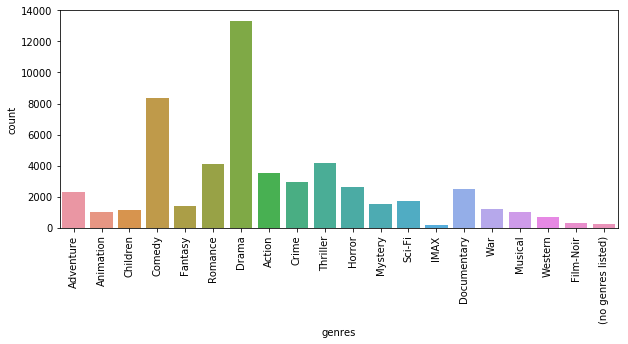

In [27]:
#analise da quantidade de filmes por genero
plt.figure(figsize=(10,4))
plt.xticks(rotation='vertical')
sns.countplot(x='genres',data=df3)

No gráfico acima pode-se perceber que os generos mais assistidos são: Drama e Comédia.

In [29]:
#contagem 
df3["genres"].value_counts()

Drama                 13344
Comedy                 8374
Thriller               4178
Romance                4127
Action                 3520
Crime                  2939
Horror                 2611
Documentary            2471
Adventure              2329
Sci-Fi                 1743
Mystery                1514
Fantasy                1412
War                    1194
Children               1139
Musical                1036
Animation              1027
Western                 676
Film-Noir               330
(no genres listed)      246
IMAX                    196
Name: genres, dtype: int64

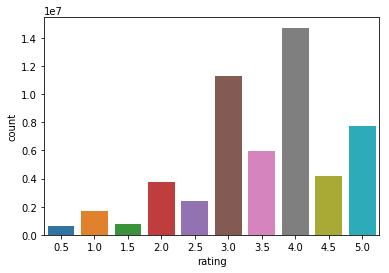

In [31]:
#Gráfico 
sns.countplot(x='rating',data=df)

In [33]:
dfmedia=df.groupby('genres').mean()

In [38]:
#generos em ordem decrescente de média das notas
dfmedia['rating'].sort_values(ascending=False) 

genres
Film-Noir             3.965381
War                   3.809531
Documentary           3.739718
Crime                 3.674528
Drama                 3.674296
Mystery               3.663509
IMAX                  3.655946
Animation             3.617494
Western               3.570498
Musical               3.558091
Romance               3.541803
Thriller              3.507111
Fantasy               3.505945
Adventure             3.501893
Action                3.443864
Sci-Fi                3.436773
Comedy                3.426011
Children              3.408114
Horror                3.277224
(no genres listed)    3.006925
Name: rating, dtype: float64

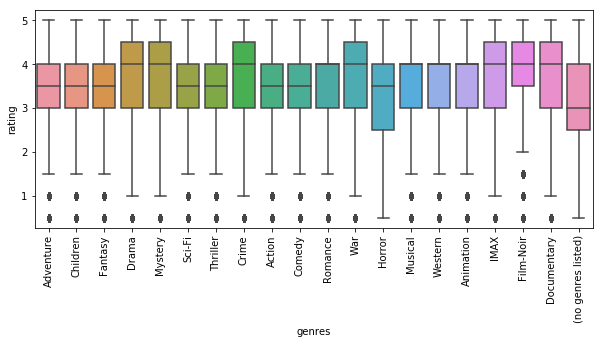

In [18]:
plt.figure(figsize=(10,4))
plt.xticks(rotation='vertical')
sns.boxplot(x='genres',y='rating',data=df)